### AZURE ASR

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install azure-cognitiveservices-speech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
access_token='sp=r&st=2023-02-16T04:32:19Z&se=2024-02-16T12:32:19Z&spr=https&sv=2021-06-08&sr=c&sig=CYqUVaGd8YX4Sb3wmfy0tTjn5f7y1z6uTFFl3Hz%2BOuk%3D'
save_dir='./audios'
df=pd.read_csv('/content/summadsfdsfsfries.csv')
df

,createdAt,information.client_name,information.language,information.recording_file_url,information.sessionId
0,2023-03-06T08:13:09.006Z,Maia,Tamil,NaN,6405a094527e0c6c0bfdfe94
1,2023-03-12T05:38:30.231Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,29107cac-7a4a-4446-b5a0-ee34db90baed
2,2023-03-12T05:31:27.065Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,30796688-4d80-48ec-9c5a-c497e8be2263
3,2023-03-12T05:29:35.539Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,bcb6b264-6a4c-49bd-b424-d09d32bf1306
4,2023-03-12T05:23:32.210Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,788bc3fe-97ad-4cef-94c7-55bd0d00b698
...,...,...,...,...,...
1972,2023-03-02T12:55:22.119Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,194ff5d1-a412-4e91-9e96-d25ee5d6e8c6
1973,2023-03-02T12:52:36.925Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,a0497824-19cc-4b75-b9d2-eba098dc0a5d
1974,2023-03-02T12:51:11.030Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,ccf433e1-f0f5-46bf-831b-2e3f23240db6
1975,2023-03-02T12:41:41.362Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,48fc7827-d666-41ad-8f72-407f6cc1cd9c


In [ ]:
len(df)-df['information.recording_file_url'].isna().sum()

1946

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,createdAt,information.client_name,information.language,information.recording_file_url,information.sessionId
0,2023-03-12T05:38:30.231Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,29107cac-7a4a-4446-b5a0-ee34db90baed
1,2023-03-12T05:31:27.065Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,30796688-4d80-48ec-9c5a-c497e8be2263
2,2023-03-12T05:29:35.539Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,bcb6b264-6a4c-49bd-b424-d09d32bf1306
3,2023-03-12T05:23:32.210Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,788bc3fe-97ad-4cef-94c7-55bd0d00b698
4,2023-03-12T05:22:00.628Z,Maia,Tamil,https://saarthistorage.blob.core.windows.net/s...,d289226b-e2c5-46e0-828c-f5b2f1aaec1e
...,...,...,...,...,...
1941,2023-03-02T12:55:22.119Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,194ff5d1-a412-4e91-9e96-d25ee5d6e8c6
1942,2023-03-02T12:52:36.925Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,a0497824-19cc-4b75-b9d2-eba098dc0a5d
1943,2023-03-02T12:51:11.030Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,ccf433e1-f0f5-46bf-831b-2e3f23240db6
1944,2023-03-02T12:41:41.362Z,Maia,Hindi,https://saarthistorage.blob.core.windows.net/s...,48fc7827-d666-41ad-8f72-407f6cc1cd9c


In [ ]:
from collections import Counter
languages = [i[0] for i in sorted(Counter(df['information.language']).items(), key=lambda x: x[1], reverse=True)[:4]]
languages

['Hindi', 'English', 'Tamil', 'Kannada']

In [ ]:
sub_df=pd.DataFrame(columns=['id', 'language', 'identified'])
idx=0

for i in range(len(df)):
    if df.loc[i]['information.language'] in languages:
        sub_df.loc[idx]=[df.loc[i]['information.sessionId'], df.loc[i]['information.language'], None]
        idx+=1

sub_df

,id,language,identified
0,29107cac-7a4a-4446-b5a0-ee34db90baed,Tamil,None
1,30796688-4d80-48ec-9c5a-c497e8be2263,Tamil,None
2,bcb6b264-6a4c-49bd-b424-d09d32bf1306,Tamil,None
3,788bc3fe-97ad-4cef-94c7-55bd0d00b698,Tamil,None
4,d289226b-e2c5-46e0-828c-f5b2f1aaec1e,Tamil,None
...,...,...,...
1405,194ff5d1-a412-4e91-9e96-d25ee5d6e8c6,Hindi,None
1406,a0497824-19cc-4b75-b9d2-eba098dc0a5d,Hindi,None
1407,ccf433e1-f0f5-46bf-831b-2e3f23240db6,Hindi,None
1408,48fc7827-d666-41ad-8f72-407f6cc1cd9c,Hindi,None


In [ ]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass


In [ ]:
for i in df['information.recording_file_url']:
    cmd='wget \"'+str(i)+'?'+access_token+'\" -P '+save_dir
    runcmd(cmd=cmd)

In [ ]:
cmd='wget \"'+str(i)+'?'+access_token+'\" -P '+save_dir
runcmd(cmd=cmd, verbose=True)

In [ ]:
! ls ./audios | wc -l

1944


In [ ]:
! zip -r audios.zip ./audios

In [ ]:
import glob

files_list = glob.glob('./audios/*')
len(files_list)

1944

In [ ]:
! mkdir customer_utterances/

In [ ]:
cust_save_path='./customer_utterances/'

for i in files_list:
    cmd='ffmpeg -i \"'+i+'\" -map_channel 0.0.0 \"'+cust_save_path+i[9:]+'_customer.wav\"'
    runcmd(cmd)

In [ ]:
utter_list = glob.glob('./customer_utterances/*.wav')
len(utter_list)

1944

In [ ]:
for i in files_list:
    if './audios/' not in i[:9]:
        print(False)

In [ ]:
! unzip customer_utterances.zip

In [ ]:
#!/usr/bin/env python
# coding: utf-8

from scipy.io import wavfile
from email.mime import audio
import json
import string
import time
import timeit
import threading
from tracemalloc import start
from threading import Timer
from typing import final
import wave
import time
from base64 import b64decode
from scipy.io.wavfile import read, write
import io
#import faulthandler; faulthandler.enable()

try:
    import azure.cognitiveservices.speech as speechsdk
except ImportError:
    print("""
    Importing the Speech SDK for Python failed.
    Refer to
    https://docs.microsoft.com/azure/cognitive-services/speech-service/quickstart-python for
    installation instructions.
    """)
    import sys
    sys.exit(1)

print(speechsdk.PropertyId)

# print(timeit.timeit(speech_language_detection_once_from_file, number=5))

<enum 'PropertyId'>


In [ ]:
def speech_language_detection_once_from_file(path):

    auto_detect_source_language_config = speechsdk.languageconfig.AutoDetectSourceLanguageConfig(languages=["en-US", "hi-IN", "ta-IN", "kn-IN"])
    

    speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
    audio_config = speechsdk.AudioConfig(filename=path)

    speech_config.enable_audio_logging()
    speech_config.set_property(
        property_id=speechsdk.PropertyId.SpeechServiceConnection_LanguageIdMode, value='Latency')
    speech_language_detection = speechsdk.SourceLanguageRecognizer(
        speech_config=speech_config, audio_config=audio_config, auto_detect_source_language_config=auto_detect_source_language_config)

    result = speech_language_detection.recognize_once()

    # Check the result
    if result.reason == speechsdk.ResultReason.RecognizedSpeech:
        detected_src_lang = result.properties[
            speechsdk.PropertyId.SpeechServiceConnection_AutoDetectSourceLanguageResult]
        return langID_to_Int[detected_src_lang]
    elif result.reason == speechsdk.ResultReason.NoMatch or result.reason == speechsdk.ResultReason.Canceled:
        return 4


In [ ]:
langID_to_Int={"en-us":0, "hi-in":1, "ta-in":2, "kn-in":3}
label_to_Int={'English':0, 'Hindi':1, 'Tamil':2, 'Kannada':3}

In [ ]:
for i in range(len(sub_df)):
    path='./customer_utterances/'+sub_df.loc[i]['id']+'_customer.wav'
    try:
        sub_df.loc[i]['identified']=speech_language_detection_once_from_file(path)
    except:
        sub_df.loc[i]['identified']=4


In [ ]:
res_count_dict=Counter(sub_df['identified'])
res_count_dict[4]/sum(res_count_dict.values())

0.40638297872340423

In [ ]:
for i in range(len(sub_df)):
    sub_df.loc[i]['language']=label_to_Int[sub_df.loc[i]['language']]

0       2
1       2
2       2
3       2
4       2
       ..
1405    1
1406    1
1407    1
1408    1
1409    1
Name: language, Length: 1410, dtype: object

In [ ]:
yhat=sub_df['identified']
y=sub_df['language']

In [ ]:
correct=0
for i in range(len(yhat)):
    if yhat[i]==y[i]:
        correct+=1

print('Accuracy: ' + str(correct/len(yhat)))

Accuracy: 0.28368794326241137


In [ ]:
sub_df_NI = sub_df[sub_df.identified != 4]
sub_df_NI.reset_index(drop=True, inplace=True)
sub_df_NI

,id,language,identified
0,29107cac-7a4a-4446-b5a0-ee34db90baed,2,0
1,30796688-4d80-48ec-9c5a-c497e8be2263,2,0
2,bcb6b264-6a4c-49bd-b424-d09d32bf1306,2,2
3,788bc3fe-97ad-4cef-94c7-55bd0d00b698,2,2
4,d289226b-e2c5-46e0-828c-f5b2f1aaec1e,2,2
...,...,...,...
832,89138eb4-7e4e-4610-b237-e8b14556152c,1,0
833,33365aab-0d3b-4274-a777-a349455fd6a8,1,0
834,157680e9-b3a5-4052-89bf-53881ddab0ae,1,0
835,cc2b22e0-a466-4fcc-823a-41336956ab5f,1,0


In [ ]:
correct=0
for i in range(len(sub_df_NI)):
    if sub_df_NI.identified[i]==sub_df_NI.language[i]:
        correct+=1

print('Accuracy: ' + str(correct/len(sub_df_NI)))

Accuracy: 0.4778972520908005


In [ ]:
while True:
    pass

KeyboardInterrupt: ignored

In [ ]:
sub_df.to_csv('result.csv', index=False)

In [ ]:
dfff=pd.read_csv('result.csv')

In [ ]:
dfff

,id,language,identified
0,29107cac-7a4a-4446-b5a0-ee34db90baed,2,0
1,30796688-4d80-48ec-9c5a-c497e8be2263,2,0
2,bcb6b264-6a4c-49bd-b424-d09d32bf1306,2,2
3,788bc3fe-97ad-4cef-94c7-55bd0d00b698,2,2
4,d289226b-e2c5-46e0-828c-f5b2f1aaec1e,2,2
...,...,...,...
1405,194ff5d1-a412-4e91-9e96-d25ee5d6e8c6,1,1
1406,a0497824-19cc-4b75-b9d2-eba098dc0a5d,1,4
1407,ccf433e1-f0f5-46bf-831b-2e3f23240db6,1,4
1408,48fc7827-d666-41ad-8f72-407f6cc1cd9c,1,4


In [ ]:
! zip -r customer_utterances.zip ./customer_utterances

  adding: customer_utterances/ (stored 0%)
  adding: customer_utterances/41c20e00-1741-4f8d-8745-943c8de8841a.mp3?sp=r&st=2023-02-16T04:32:19Z&se=2024-02-16T12:32:19Z&spr=https&sv=2021-06-08&sr=c&sig=CYqUVaGd8YX4Sb3wmfy0tTjn5f7y1z6uTFFl3Hz+Ouk=_customer.wav (deflated 84%)
  adding: customer_utterances/b914fc56-37ce-4c97-bed4-e502d876f0a3.mp3?sp=r&st=2023-02-16T04:32:19Z&se=2024-02-16T12:32:19Z&spr=https&sv=2021-06-08&sr=c&sig=CYqUVaGd8YX4Sb3wmfy0tTjn5f7y1z6uTFFl3Hz+Ouk=_customer.wav (deflated 69%)
  adding: customer_utterances/b111bfc6-1c55-463b-a5d3-d5c9d07d76de.mp3?sp=r&st=2023-02-16T04:32:19Z&se=2024-02-16T12:32:19Z&spr=https&sv=2021-06-08&sr=c&sig=CYqUVaGd8YX4Sb3wmfy0tTjn5f7y1z6uTFFl3Hz+Ouk=_customer.wav (deflated 86%)
  adding: customer_utterances/4322769d-2395-4790-9663-8cdd18abf927.mp3?sp=r&st=2023-02-16T04:32:19Z&se=2024-02-16T12:32:19Z&spr=https&sv=2021-06-08&sr=c&sig=CYqUVaGd8YX4Sb3wmfy0tTjn5f7y1z6uTFFl3Hz+Ouk=_customer.wav (deflated 88%)
  adding: customer_utterances/52303f4

In [ ]:
from IPython.display import Audio
Audio(path, autoplay=True)

In [ ]:
path in utter_list

True

In [ ]:
while True:
    pass

In [ ]:
import timeit
import time

def _template_func(setup, func):
    """Create a timer function. Used if the "statement" is a callable."""
    def inner(_it, _timer, _func=func):
        setup()
        _t0 = _timer()
        for _i in _it:
            retval = _func()
        _t1 = _timer()
        return _t1 - _t0, retval
    return inner

timeit._template_func = _template_func

def foo():
    time.sleep(1)
    return 42

t = timeit.Timer(foo)
print(t.timeit(number=1))

1.0019189109998479


In [ ]:
import time

t=time.perf_counter()
print(foo())
print(time.perf_counter()-t)

42
1.0040794610004014


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
res=pd.read_csv('result.csv')
res.head()

,id,language,identified
0,29107cac-7a4a-4446-b5a0-ee34db90baed,2,0
1,30796688-4d80-48ec-9c5a-c497e8be2263,2,0
2,bcb6b264-6a4c-49bd-b424-d09d32bf1306,2,2
3,788bc3fe-97ad-4cef-94c7-55bd0d00b698,2,2
4,d289226b-e2c5-46e0-828c-f5b2f1aaec1e,2,2


In [ ]:
y=res['language']
yhat=res['identified']

In [ ]:
cm=confusion_matrix(y, yhat, labels=[0,1,2,3,4])

In [ ]:
cm_df = pd.DataFrame(cm, index = ['English','Hindi','Tamil', 'Kannada', 'None'], columns = ['English','Hindi','Tamil', 'Kannada', 'None'])

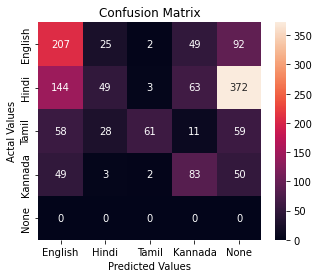

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
cm

array([[207,  25,   2,  49,  92],
       [144,  49,   3,  63, 372],
       [ 58,  28,  61,  11,  59],
       [ 49,   3,   2,  83,  50],
       [  0,   0,   0,   0,   0]])

In [ ]:
! unzip samples.zip

In [ ]:
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt

class VoiceActivityDetector():
    """ Use signal energy to detect voice activity in wav file """
    
    def __init__(self, wave_input_filename):
        self._read_wav(wave_input_filename)._convert_to_mono()
        self.sample_window = 0.02 #20 ms
        self.sample_overlap = 0.01 #10ms
        self.speech_window = 0.5 #half a second
        self.speech_energy_threshold = 0.6 #60% of energy in voice band
        self.speech_start_band = 300
        self.speech_end_band = 3000
           
    def _read_wav(self, wave_file):
        self.rate, self.data = wf.read(wave_file)
        self.channels = len(self.data.shape)
        self.filename = wave_file
        return self
    
    def _convert_to_mono(self):
        if self.channels == 2 :
            self.data = np.mean(self.data, axis=1, dtype=self.data.dtype)
            self.channels = 1
        return self
    
    def _calculate_frequencies(self, audio_data):
        data_freq = np.fft.fftfreq(len(audio_data),1.0/self.rate)
        data_freq = data_freq[1:]
        return data_freq    
    
    def _calculate_amplitude(self, audio_data):
        data_ampl = np.abs(np.fft.fft(audio_data))
        data_ampl = data_ampl[1:]
        return data_ampl
        
    def _calculate_energy(self, data):
        data_amplitude = self._calculate_amplitude(data)
        data_energy = data_amplitude ** 2
        return data_energy
        
    def _znormalize_energy(self, data_energy):
        energy_mean = np.mean(data_energy)
        energy_std = np.std(data_energy)
        energy_znorm = (data_energy - energy_mean) / energy_std
        return energy_znorm
    
    def _connect_energy_with_frequencies(self, data_freq, data_energy):
        energy_freq = {}
        for (i, freq) in enumerate(data_freq):
            if abs(freq) not in energy_freq:
                energy_freq[abs(freq)] = data_energy[i] * 2
        return energy_freq
    
    def _calculate_normalized_energy(self, data):
        data_freq = self._calculate_frequencies(data)
        data_energy = self._calculate_energy(data)
        #data_energy = self._znormalize_energy(data_energy) #znorm brings worse results
        energy_freq = self._connect_energy_with_frequencies(data_freq, data_energy)
        return energy_freq
    
    def _sum_energy_in_band(self,energy_frequencies, start_band, end_band):
        sum_energy = 0
        for f in energy_frequencies.keys():
            if start_band<f<end_band:
                sum_energy += energy_frequencies[f]
        return sum_energy
    
    def _median_filter (self, x, k):
        assert k % 2 == 1, "Median filter length must be odd."
        assert x.ndim == 1, "Input must be one-dimensional."
        k2 = (k - 1) // 2
        y = np.zeros ((len (x), k), dtype=x.dtype)
        y[:,k2] = x
        for i in range (k2):
            j = k2 - i
            y[j:,i] = x[:-j]
            y[:j,i] = x[0]
            y[:-j,-(i+1)] = x[j:]
            y[-j:,-(i+1)] = x[-1]
        return np.median (y, axis=1)
        
    def _smooth_speech_detection(self, detected_windows):
        median_window=int(self.speech_window/self.sample_window)
        if median_window%2==0: median_window=median_window-1
        median_energy = self._median_filter(detected_windows[:,1], median_window)
        return median_energy
        
    def convert_windows_to_readible_labels(self, detected_windows):
        """ Takes as input array of window numbers and speech flags from speech
        detection and convert speech flags to time intervals of speech.
        Output is array of dictionaries with speech intervals.
        """
        speech_time = []
        is_speech = 0
        for window in detected_windows:
            if (window[1]==1.0 and is_speech==0): 
                is_speech = 1
                speech_label = {}
                speech_time_start = window[0] / self.rate
                speech_label['speech_begin'] = speech_time_start
                print(window[0], speech_time_start)
                #speech_time.append(speech_label)
            if (window[1]==0.0 and is_speech==1):
                is_speech = 0
                speech_time_end = window[0] / self.rate
                speech_label['speech_end'] = speech_time_end
                speech_time.append(speech_label)
                print(window[0], speech_time_end)
        return speech_time
      
    def plot_detected_speech_regions(self):
        """ Performs speech detection and plot original signal and speech regions.
        """
        data = self.data
        detected_windows = self.detect_speech()
        data_speech = np.zeros(len(data))
        it = np.nditer(detected_windows[:,0], flags=['f_index'])
        while not it.finished:
            data_speech[int(it[0])] = data[int(it[0])] * detected_windows[it.index,1]
            it.iternext()
        plt.figure()
        plt.plot(data_speech)
        plt.plot(data)
        plt.show()
        return self
       
    def detect_speech(self):
        """ Detects speech regions based on ratio between speech band energy
        and total energy.
        Output is array of window numbers and speech flags (1 - speech, 0 - nonspeech).
        """
        detected_windows = np.array([])
        sample_window = int(self.rate * self.sample_window)
        sample_overlap = int(self.rate * self.sample_overlap)
        data = self.data
        sample_start = 0
        start_band = self.speech_start_band
        end_band = self.speech_end_band
        while (sample_start < (len(data) - sample_window)):
            sample_end = sample_start + sample_window
            if sample_end>=len(data): sample_end = len(data)-1
            data_window = data[sample_start:sample_end]
            energy_freq = self._calculate_normalized_energy(data_window)
            sum_voice_energy = self._sum_energy_in_band(energy_freq, start_band, end_band)
            sum_full_energy = sum(energy_freq.values())
            speech_ratio = sum_voice_energy/sum_full_energy
            # Hipothesis is that when there is a speech sequence we have ratio of energies more than Threshold
            speech_ratio = speech_ratio>self.speech_energy_threshold
            detected_windows = np.append(detected_windows,[sample_start, speech_ratio])
            sample_start += sample_overlap
        detected_windows = detected_windows.reshape(int(len(detected_windows)/2),2)
        detected_windows[:,1] = self._smooth_speech_detection(detected_windows)
        return detected_windows
 


In [ ]:
! pip install azure-cognitiveservices-speech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.7 MB/s eta 0:00:00


In [ ]:
#!/usr/bin/env python
# coding: utf-8

from scipy.io import wavfile
from email.mime import audio
import json
import string
import time
import timeit
import threading
from tracemalloc import start
from threading import Timer
from typing import final
import wave
import time
from base64 import b64decode
from scipy.io.wavfile import read, write
import io
#import faulthandler; faulthandler.enable()

try:
    import azure.cognitiveservices.speech as speechsdk
except ImportError:
    print("""
    Importing the Speech SDK for Python failed.
    Refer to
    https://docs.microsoft.com/azure/cognitive-services/speech-service/quickstart-python for
    installation instructions.
    """)
    import sys
    sys.exit(1)

print(speechsdk.PropertyId)



# print(timeit.timeit(speech_language_detection_once_from_file, number=5))


<enum 'PropertyId'>


In [ ]:
import scipy.io.wavfile as wf

path = 'samples/3.wav'
v = VoiceActivityDetector(path)

rate, data = wf.read(path)

In [ ]:
from IPython.display import Audio
Audio(path, autoplay=True)

<ipython-input-4-6422c33baad2>:149: RuntimeWarning: invalid value encountered in double_scalars
  speech_ratio = sum_voice_energy/sum_full_energy


<Figure size 72000x21600 with 0 Axes>

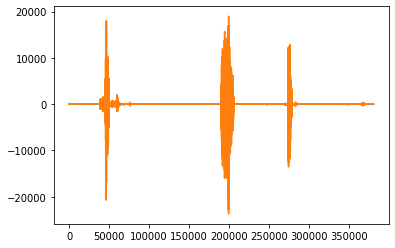

In [ ]:
v.plot_detected_speech_regions()

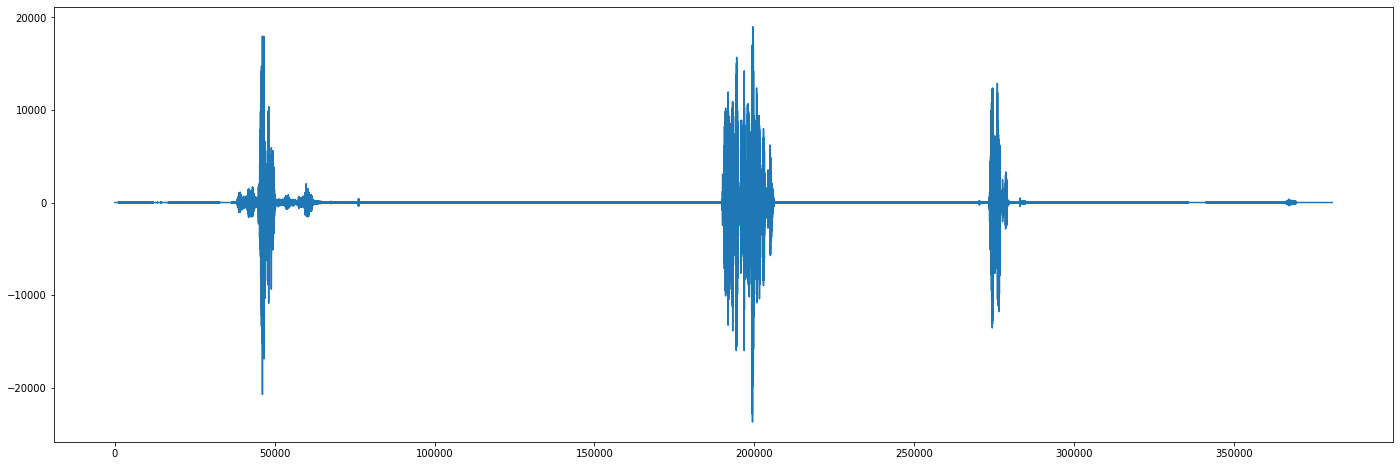

In [ ]:
plt.figure(figsize=(24,8))
plt.plot(data)
plt.show()

In [ ]:
channels = 1
bitsPerSample = 16
samplesPerSecond = 16000
audioFormat = speechsdk.audio.AudioStreamFormat(samplesPerSecond, bitsPerSample, channels)
custom_push_stream = speechsdk.audio.PushAudioInputStream(stream_format=audioFormat)

In [ ]:
import wave
import audioop

with wave.open(path) as fd:
    params = fd.getparams()
    frames = fd.readframes(1000000)

In [ ]:
custom_push_stream.write(frames)

In [ ]:
custom_push_stream

In [ ]:
params

_wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=380736, comptype='NONE', compname='not compressed')

In [ ]:
auto_detect_source_language_config = speechsdk.languageconfig.AutoDetectSourceLanguageConfig(languages=["en-US", "hi-IN", "ta-IN", "kn-IN"])
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)

audioconfig=speechsdk.audio.AudioConfig(stream=custom_push_stream)

speech_config.enable_audio_logging()
speech_config.set_property(
    property_id=speechsdk.PropertyId.SpeechServiceConnection_LanguageIdMode, value='Latency')
speech_language_detection = speechsdk.SourceLanguageRecognizer(
    speech_config=speech_config, audio_config=audioconfig, auto_detect_source_language_config=auto_detect_source_language_config)

result = speech_language_detection.recognize_once()

detected_src_lang = result.properties[
        speechsdk.PropertyId.SpeechServiceConnection_AutoDetectSourceLanguageResult]

print(detected_src_lang)


hi-in


In [ ]:
len(data)

380736

In [ ]:
len(frames)

761472

In [ ]:
def push_stream_writer(stream):
    # The number of bytes to push per buffer
    n_bytes = 3200
    wav_fh = wave.open(path)
    # start pushing data until all data has been read from the file
    try:
        while True:
            frames = wav_fh.readframes(n_bytes // 2)
            print('read {} bytes'.format(len(frames)))
            if not frames:
                break
            stream.write(frames)
            time.sleep(.1)
    finally:
        wav_fh.close()
        stream.close()


# def speech_recognition_with_push_stream():
"""gives an example how to use a push audio stream to recognize speech from a custom audio
source"""
auto_detect_source_language_config = speechsdk.languageconfig.AutoDetectSourceLanguageConfig(languages=["en-US", "hi-IN", "ta-IN", "kn-IN"])
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)

# setup the audio stream
stream = speechsdk.audio.PushAudioInputStream()
audio_config = speechsdk.audio.AudioConfig(stream=stream)

# instantiate the speech recognizer with push stream input
speech_language_detection = speechsdk.SourceLanguageRecognizer(
    speech_config=speech_config, audio_config=audio_config, auto_detect_source_language_config=auto_detect_source_language_config)
recognition_done = threading.Event()

# Connect callbacks to the events fired by the speech recognizer
# def session_stopped_cb(evt):
#     """callback that signals to stop continuous recognition upon receiving an event `evt`"""
#     print('SESSION STOPPED: {}'.format(evt))
#     recognition_done.set()

# speech_language_detection.recognizing.connect(lambda evt: print('RECOGNIZING: {}'.format(evt)))
speech_language_detection.recognized.connect(lambda evt: print('RECOGNIZED: {}'.format(evt)))
# speech_language_detection.session_started.connect(lambda evt: print('SESSION STARTED: {}'.format(evt)))
# speech_language_detection.session_stopped.connect(session_stopped_cb)
speech_language_detection.canceled.connect(lambda evt: print('CANCELED {}'.format(evt)))

# start push stream writer thread
push_stream_writer_thread = threading.Thread(target=push_stream_writer, args=[stream])
push_stream_writer_thread.start()

# start continuous speech recognition
if speech_language_detection.speech_start_detected
speech_language_detection.start_continuous_recognition_async()

if speech_language_detection.recognizing: print(speech_language_detection.recognizing)

# wait until all input processed
recognition_done.wait()

# stop recognition and clean up
speech_language_detection.start_continuous_recognition_async()
push_stream_writer_thread.join()

In [ ]:
speech_recognition_with_push_stream()

In [ ]:
speech_language_detection.recognizing

<ipython-input-4-6422c33baad2>:149: RuntimeWarning: invalid value encountered in double_scalars
  speech_ratio = sum_voice_energy/sum_full_energy


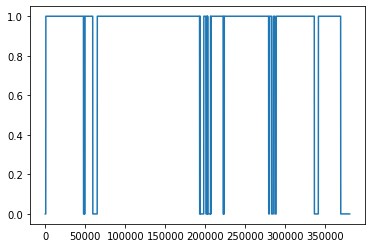

In [ ]:
m=v.detect_speech().shape[0]
r=v.detect_speech().reshape(m, 2, 1)
x=r[:,0]
y=r[:,1]
plt.plot(x,y)
plt.show()

In [ ]:
import scipy.io.wavfile as wf

rate, data=wf.read(path)

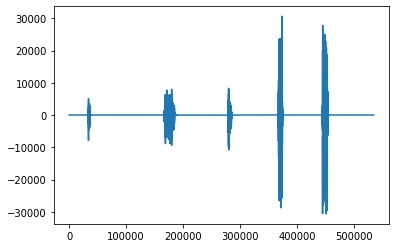

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
! pip install speechbrain
# ! unzip /content/drive/MyDrive/Cust_utt/customer_utterances.zip

/usr/local/bin/pip: /usr/local/bin/pip3: /usr/bin/python3: bad interpreter: No such file or directory
/usr/local/bin/pip: line 50: /usr/local/bin/pip3: Success
unzip:  cannot find or open /content/drive/MyDrive/Cust_utt/customer_utterances.zip, /content/drive/MyDrive/Cust_utt/customer_utterances.zip.zip or /content/drive/MyDrive/Cust_utt/customer_utterances.zip.ZIP.


In [ ]:
import glob
import subprocess
import pandas as pd
from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
from collections import Counter
import os
# import json
# import string
import time
# import timeit
# import threading
# from tracemalloc import start
# from threading import Timer
# from typing import final
# import wave
# import time
# from base64 import b64decode
# from scipy.io.wavfile import read, write
# from scipy.io import wavfile
# from email.mime import audio
# import io

import torchaudio
from speechbrain.pretrained import EncoderClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
language_id = EncoderClassifier.from_hparams(source="sahita/language-identification", savedir="tmp")

In [ ]:
def huggingface_LID_model(path):

    langID_to_Int={"en":0, "hi":1, "other":3} # other language detected
    signal = language_id.load_audio(path)
    prediction =  language_id.classify_batch(signal)
    return langID_to_Int[prediction]

def data_loading(path_to_df):

    # Load and clean dataset
    print('Loading Dataset....')
    df = pd.read_csv(path_to_df)
    df.dropna(inplace = True)
    df.reset_index(drop = True, inplace = True)

    return df

def pruned_dataframe(df):

    # Choose 4 most abundant languages
    print('Pruning DataFrame....')
    lang_dict = Counter(df['information.language'])
    sorted_by_counts = list(sorted(lang_dict.items(), key = lambda x: x[1], reverse = True))
    top_4_lang = [ i[0] for i in sorted_by_counts ][:4]

    # Eliminate other languages and eliminate unwanted features
    sub_df=pd.DataFrame(columns=['id', 'language', 'identified'])
    idx=0   # Index for sub_df

    # Select ID, language from original df and assign identified language as None
    for i in range(len(df)):
        if df.loc[i]['information.language'] in top_4_lang:
            sub_df.loc[idx]=[df.loc[i]['information.sessionId'], df.loc[i]['information.language'], None]
            idx+=1

    return sub_df

def make_predictions(utter_dir, sub_df, res_file='./hf_results.csv'):

    print('Making Predictions....')
    for i in range(len(sub_df)):
        if not i % 100: print('Sample {}'.format(i))

        path=os.path.join(utter_dir, sub_df.loc[i]['id'])+'_customer.wav'
        # try:
        sub_df.loc[i]['identified']=huggingface_LID_model(path)
        # except:
        #     sub_df.loc[i]['identified']=4

    # Save results
    sub_df.to_csv(res_file)

    return sub_df


def evaluate(sub_df):

    yhat = sub_df['identified']

    label_to_Int = {'English':0, 'Hindi':1, 'Tamil':2, 'Kannada':3}

    # Unrecognized Percentage
    res_count_dict = Counter(yhat)
    print('Percent unrecognized: {:.2f}'.format(res_count_dict[4]/sum(res_count_dict.values())*100))

    for i in range(len(sub_df)):
        sub_df.loc[i]['language']=label_to_Int[sub_df.loc[i]['language']]
    y = sub_df['language']

    # Accuracy including Not Identified
    correct_not_det=0
    for i in range(len(yhat)):
        if yhat[i] == y[i]:
            correct_not_det += 1

    print('Accuracy including not identified: {:.2f}'.format(correct_not_det/len(y)*100))

    # Remove not identified from sub_df
    sub_df_det = sub_df[sub_df.identified != 4]
    sub_df_det.reset_index(drop=True, inplace=True)

    # Accuracy excluding Not Identified
    correct_det = 0
    for i in range(len(sub_df_det)):
        if sub_df_det.identified[i]==sub_df_det.language[i]:
            correct_det+=1

    print('Accuracy excluding not identified: {:.2f}'.format(correct_det/len(sub_df_det)*100))

    # Confusion Matrix
    cm=confusion_matrix(y, yhat, labels=[0,1,2,3,4])
    cm_df = pd.DataFrame(cm, index = ['English','Hindi','Tamil', 'Kannada', 'None'],
            columns = ['English','Hindi','Tamil', 'Kannada', 'None'])
    print(cm_df)

In [ ]:
utter_dir='./customer_utterances'
path = './dataset.csv'

df = data_loading(path)
sub_df = pruned_dataframe(df)
# download_recordings(df, audio_dir, utterance_dir)
t1 = time.perf_counter()
sub_df = make_predictions(utter_dir, sub_df, res_file='hf_results.csv')
t2 = time.perf_counter()
print('Time taken for evaluation of {} samples is {:.2f} seconds'.format(len(sub_df), t2-t1))
evaluate(sub_df)

In [ ]:
res=pd.read_csv('hf_results.csv')
Counter(res['identified'])

Counter({4: 1410})

In [ ]:
import glob
ls = glob.glob('*')
"29107cac-7a4a-4446-b5a0-ee34db90baed_customer.wav" in ls

True

In [ ]:
ls

In [ ]:
path='/content/0268286c-0242-4514-a9d9-ffde6aded733_customer.wav'

In [ ]:
langID_to_Int={"en":0, "hi":1, "other":3} # other language detected
signal = language_id.load_audio(os.path.abspath(path))
prediction =  language_id.classify_batch(signal)
langID_to_Int[prediction]

In [ ]:
os.path.abspath('.')

'/content'

In [ ]:
! ls -l /usr/bin/python3

lrwxrwxrwx 1 root root 25 Mar 22 13:28 /usr/bin/python3 -> /etc/alternatives/python3


In [ ]:
! unlink /etc/alternatives/python3

unlink: cannot unlink '/etc/alternatives/python3': No such file or directory


In [ ]:
!apt-get install nginx

In [ ]:
! pip install fastapi azure.cognitiveservices.speech python-multipart uvicorn

In [ ]:
import shutil

from fastapi import FastAPI, File, UploadFile

import glob
import time
import json
import azure.cognitiveservices.speech as speechsdk

# Secrets

def speech_language_detection_once_from_continuous(file_path):
    """performs continuous speech language detection with input from an audio file"""
    # <SpeechContinuousLanguageDetectionWithFile>
    # Creates an AutoDetectSourceLanguageConfig, which defines a number of possible spoken languages
    auto_detect_source_language_config = \
        speechsdk.languageconfig.AutoDetectSourceLanguageConfig(languages=['hi-in', 'en-in', 'ta-in', 'mr-in', 'gu-in', 'kn-in', 'ml-in', 'te-in'])

    # Creates a SpeechConfig from your speech key and region
    speech_config = speechsdk.SpeechConfig(subscription=SPEECH_KEY, region=SERVICE_REGION)

    # Set continuous language detection (override the default of "AtStart")
    speech_config.set_property(
        property_id=speechsdk.PropertyId.SpeechServiceConnection_LanguageIdMode, value='Continuous')
    speech_config.set_property(speechsdk.PropertyId.Speech_LogFilename, "../log_file")

    audio_config = speechsdk.audio.AudioConfig(filename=file_path)

    source_language_recognizer = speechsdk.SourceLanguageRecognizer(
        speech_config=speech_config,
        auto_detect_source_language_config=auto_detect_source_language_config,
        audio_config=audio_config)

    done = False
    
    predictions = list()
    
    def stop_cb(evt: speechsdk.SessionEventArgs):
        """callback that signals to stop continuous recognition upon receiving an event `evt`"""
        print('CLOSING on {}'.format(evt))
        nonlocal done
        done = True

    def audio_recognized(evt: speechsdk.SpeechRecognitionEventArgs):
        """
        callback that catches the recognized result of audio from an event 'evt'.
        :param evt: event listened to catch recognition result.
        :return:
        """
        
        if evt.result.reason == speechsdk.ResultReason.RecognizedSpeech:
            if evt.result.properties.get(
                    speechsdk.PropertyId.SpeechServiceConnection_AutoDetectSourceLanguageResult) is None:
                print("Unable to detect any language")
            else:
                detected_src_lang = evt.result.properties[
                    speechsdk.PropertyId.SpeechServiceConnection_AutoDetectSourceLanguageResult]
                json_result = evt.result.properties[speechsdk.PropertyId.SpeechServiceResponse_JsonResult]
                detail_result = json.loads(json_result)
                start_offset = detail_result['Offset']
                duration = detail_result['Duration']
                if duration >= 0:
                    end_offset = duration + start_offset
                else:
                    end_offset = 0
                    
                if not predictions[-1][0] == detected_src_lang:
                    predictions.append(tuple(detected_src_lang, start_offset))
                
                global language_detected
                language_detected = True

    # Connect callbacks to the events fired by the speech recognizer
    source_language_recognizer.recognized.connect(audio_recognized)
    source_language_recognizer.session_started.connect(lambda evt: print('SESSION STARTED: {}'.format(evt)))
    source_language_recognizer.session_stopped.connect(lambda evt: print('SESSION STOPPED {}'.format(evt)))
    source_language_recognizer.canceled.connect(lambda evt: print('CANCELED {}'.format(evt)))
    # stop continuous recognition on either session stopped or canceled events
    source_language_recognizer.session_stopped.connect(stop_cb)
    source_language_recognizer.canceled.connect(stop_cb)

    # Start continuous speech recognition
    source_language_recognizer.start_continuous_recognition()
    while not done:
        time.sleep(.5)

    source_language_recognizer.stop_continuous_recognition()
    # </SpeechContinuousLanguageDetectionWithFile>

    # Connect callbacks to the events fired by the speech recognizer
    source_language_recognizer.recognized.connect(audio_recognized)
    source_language_recognizer.session_started.connect(lambda evt: print('SESSION STARTED: {}'.format(evt)))
    source_language_recognizer.session_stopped.connect(lambda evt: print('SESSION STOPPED {}'.format(evt)))
    source_language_recognizer.canceled.connect(lambda evt: print('CANCELED {}'.format(evt)))
    # stop continuous recognition on either session stopped or canceled events
    source_language_recognizer.session_stopped.connect(stop_cb)
    source_language_recognizer.canceled.connect(stop_cb)

    # Start continuous speech recognition
    source_language_recognizer.start_continuous_recognition()
    while not done:
        time.sleep(.5)

    source_language_recognizer.stop_continuous_recognition()
    # </SpeechContinuousLanguageDetectionWithFile>
    return predictions

app = FastAPI()


@app.post("/uploadfile/")
async def create_upload_file(file: UploadFile):
    save_path = f'/tmp/{file.filename}'
    with open(save_path, 'wb') as buffer:
        shutil.copyfileobj(file.file, buffer)
        
    predictions = speech_language_detection_once_from_continuous(save_path)
    
    return{'predictions':predictions}


In [ ]:
! uvicorn test:app --host 127.0.0.1 --port 12000 --reload

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:     Started reloader process [3838] using StatReload
INFO:     Started server process [3840]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [3840]
INFO:     Stopping reloader process [3838]


IndentationError: ignored